In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm
import numpy as np

from scipy.ndimage import median_filter
def auto_mask(image, size=2, thershold=5, edge=2):

    blur_image = median_filter(image, size)
    diff_image = image - blur_image
    thershold_value = thershold*np.std(diff_image)

    dead_pixels = np.nonzero((np.abs(diff_image[edge: -edge, edge: -edge])) > thershold_value)
    dead_pixels = np.array(dead_pixels) + edge

    for i, j in zip(dead_pixels[0], dead_pixels[1]):
        image[i, j] = blur_image[i, j]
    return image

In [2]:
data_dir = "/Volumes/Data/BeamLines/CHX/Luxi_description_files_for_duke/duke_cc_12C/"
duke_ndata = np.load(data_dir+"duke_img_1_5000.npy")
duke_dark = np.load(data_dir+"duke_dark.npy")

duke_data = []
for i in range(duke_ndata.shape[0]):
    duke_data.append(duke_ndata[i] - duke_dark)
    
duke_data=np.asarray(duke_data)

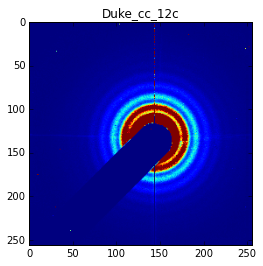

In [3]:
sum_img = np.average(duke_data, axis=0)
plt.imshow(sum_img, vmax=1e0)
plt.title("Duke_cc_12c")
plt.show()

In [4]:
auto_img=auto_mask(sum_img, size =100, thershold=2)

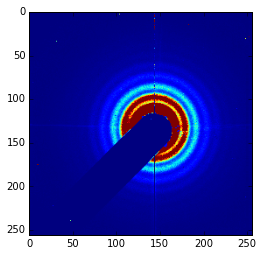

In [5]:
plt.imshow(auto_img, vmax=1e0)
plt.show()

In [6]:
blur_image = median_filter(sum_img, size=100)

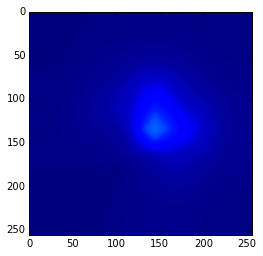

In [7]:
plt.imshow(blur_image, vmax=1e0)

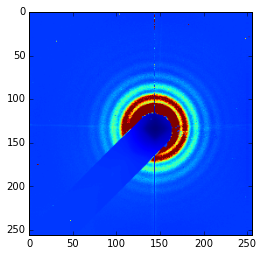

In [8]:
diff_image = sum_img - blur_image
plt.imshow(diff_image, vmax=1e0)

In [9]:
2*np.std(diff_image)


1187.2604243371475

In [10]:
6*np.std(blur_image)

0.19436597732293615

In [11]:
np.abs(diff_image[1: -1, 1: -1])

array([[ 0.0008,  0.001 ,  0.0016, ...,  0.0012,  0.0012,  0.0002],
       [ 0.0006,  0.0004,  0.0012, ...,  0.0006,  0.0012,  0.0006],
       [ 0.0006,  0.0014,  0.0004, ...,  0.0022,  0.001 ,  0.002 ],
       ..., 
       [ 0.0002,  0.0002,  0.0002, ...,  0.0002,  0.0004,  0.0008],
       [ 0.0002,  0.0002,  0.0002, ...,  0.0008,  0.0002,  0.0022],
       [ 0.0002,  0.0002,  0.    , ...,  0.0004,  0.0028,  0.0016]])

In [12]:
dead_pixels = np.nonzero(np.abs(diff_image) > 20*np.std(diff_image))

In [13]:
dead_pixels

(array([  0,   0,   4,   5,   6,  10,  12,  15,  15,  18,  29, 175]),
 array([143, 156, 143, 143, 143, 143, 143, 143, 182, 143, 251,  10]))

In [15]:
sum1 = sum_img
for i, j in zip(dead_pixels[0], dead_pixels[1]):
        sum1[i, j] = blur_image[i, j]


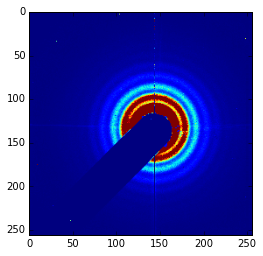

In [16]:
plt.imshow(sum1, vmax=1e0)

In [95]:
10*np.std(sum_img)

226.75906637768136

In [96]:
sum_img[sum_img>2000] = np.std(sum_img)

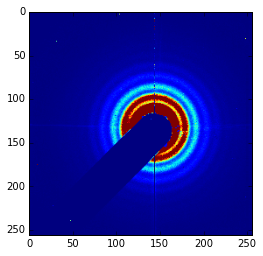

In [97]:
plt.imshow(sum_img, vmax=1e0)

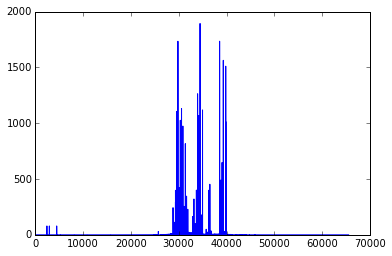

In [98]:
plt.plot(np.ravel(sum_img))

In [99]:
import skimage

In [37]:
from skimage import filter, data

/Users/sameera/mc/envs/work/lib/python2.7/site-packages/skimage/filter/__init__.py:6: skimage_deprecation: The `skimage.filter` module has been renamed to `skimage.filters`.  This placeholder module will be removed in v0.13.
  warn(skimage_deprecation('The `skimage.filter` module has been renamed '


In [38]:
camera = data.camera()
camera_equalized = filter.hsobel(camera)

/Users/sameera/mc/envs/work/lib/python2.7/site-packages/skimage/filters/edges.py:173: skimage_deprecation: Call to deprecated function ``hsobel``. Use ``skimage.filters.sobel_h`` instead.
  def hsobel(image, mask=None):


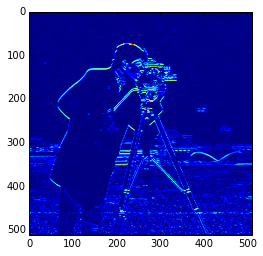

In [39]:
plt.imshow(camera_equalized)

/Users/sameera/mc/envs/work/lib/python2.7/site-packages/skimage/filters/edges.py:173: skimage_deprecation: Call to deprecated function ``hsobel``. Use ``skimage.filters.sobel_h`` instead.
  def hsobel(image, mask=None):


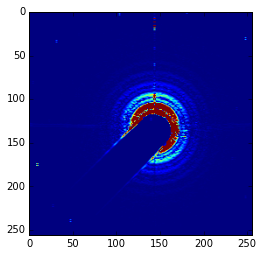

In [40]:
ty=filter.hsobel(sum_img)
plt.imshow(ty, vmax=1e0)

In [41]:
np.mean(sum_img)

0.85431623944523682

In [42]:
import numpy as np

x1 = np.arange(9.0).reshape((3, 3))

In [43]:
y=np.add(x1, x1)

In [44]:
y

array([[  0.,   2.,   4.],
       [  6.,   8.,  10.],
       [ 12.,  14.,  16.]])

In [45]:
x1

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.]])

In [46]:
summed_img= np.sum(duke_data, axis=0)

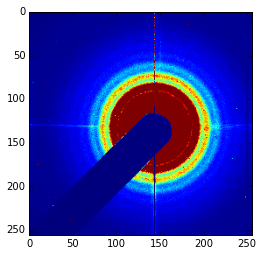

In [47]:
plt.imshow(summed_img, vmax=1e3)

In [48]:
summed_img[summed_img==0]=np.std(sum_img)

In [80]:
sum_img[summed_img==0] = np.std(sum_img)

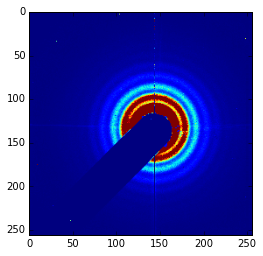

In [81]:
plt.imshow(sum_img, vmax=1e0)
plt.show()

In [82]:
import skxray.speckle_visibility.speckle_visibility as spe_vis

data_dir = "/Users/sameera/Desktop/XSVS/Luxi_data/"

mask= ~np.load(data_dir+"Luxi_duke_mask.npy")

mask_sum_img = sum_img*mask

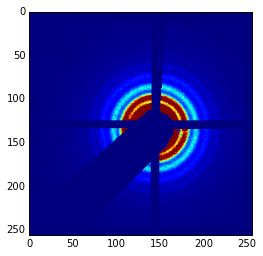

In [83]:
plt.imshow(mask_sum_img, vmax=1e0)

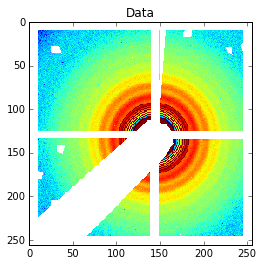

In [84]:
import skxray.roi as roi
import skxray.core as core

inner_radius = 24
width = 1
spacing = 1
num_rings = 9

edges = roi.ring_edges(inner_radius, width, spacing, num_rings)

rings = roi.rings(edges, (133, 143), sum_img.shape)

def test_demo(ax, label_array, img_dim, image):
    """
    This will plot the reqiured roi's on the image
    """

    vmin, vmax = np.percentile(image, [100, 100])
    #im = ax.imshow(tt.reshape(*img_dim), cmap='Paired', interpolation='nearest')
    im = ax.imshow(image, interpolation='none', norm=LogNorm(), vmax=1e0)
    im = ax.imshow(label_array, interpolation='none', norm=LogNorm())
    #im = ax.imshow(image, interpolation='none',  vmax=1e0)
    
    
fig, ax = plt.subplots()
plt.title("Data")
test_demo(ax, rings*mask, sum_img.shape, sum_img*mask)
plt.show()

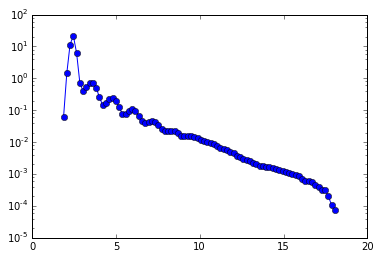

In [85]:
est_center = (133, 143)

bin_cen, ring_avg = core.circular_average(sum_img*mask, est_center, thershold=0, nx=100,
                                         pixel_size=(0.1, 0.1))

plt.semilogy(bin_cen, ring_avg, "-o")
plt.show()

In [91]:
int_dist1 = spe_vis.intensity_distribution(sum_img*mask, rings*mask)

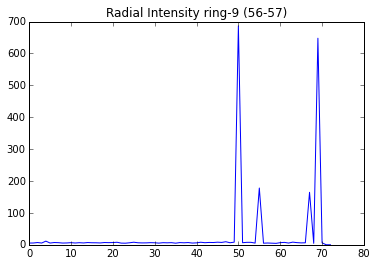

In [94]:
plt.plot(int_dist1.values()[0])
plt.title("Radial Intensity ring-9 (56-57)")
plt.show()

In [50]:
np.max(summed_img)

325969637

In [66]:
np.average(sum_img)

1.3469593475341795

In [67]:
np.average(summed_img)

193461.90840148926

In [51]:
np.max(sum_img)

11092.472599999999

In [59]:
def num_time_bins(n, r):
    """
    Given a base r find the number of steps such that the
    geometric sum to k with base r < n
    """

    k = np.log((n * (r - 1) + 1) / r) / np.log(r)
    
    return np.floor(k) + 1

In [60]:
np.min(summed_img)

0

In [61]:
def test_time_bins():
    for r in np.random.randint(2, 7, 100):
        for n in np.random.randint(70, 1000, 100):
            k = num_time_bins(n, r)
            try:
                assert np.sum(r ** np.arange(k)) < n
                assert np.sum(r ** np.arange(k + 1)) > n
            except:
                print(r, n, k)
                raise


In [69]:
np.count_nonzero(summed_img)

61462

In [70]:
256*256

65536

In [71]:
65536-np.count_nonzero(summed_img)

4074